In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

### Data Setup and EDA

In [14]:
index_data=pd.read_csv('D:\DataSets\Sensex.csv',)
index_data.head()

,Date,Open,High,Low,Close
0,1-Jan-16,26101.50,26197.27,26008.20,26160.90
1,4-Jan-16,26116.52,26116.52,25596.57,25623.35
2,5-Jan-16,25744.70,25766.76,25513.75,25580.34
3,6-Jan-16,25628.23,25632.57,25357.70,25406.33
4,7-Jan-16,25224.70,25230.35,24825.70,24851.83


In [66]:
index_data.tail()

,Date,Open,High,Low,Close
1289,17-Mar-21,50436.02,50561.12,49718.65,49801.62
1290,18-Mar-21,50161.25,50296.35,48962.36,49216.52
1291,19-Mar-21,48881.19,50003.58,48586.93,49858.24
1292,22-Mar-21,49878.77,49878.77,49281.02,49771.29
1293,23-Mar-21,49876.21,50264.65,49661.92,50051.44


In [15]:
index_data['Close'].tail()

1289    49801.62
1290    49216.52
1291    49858.24
1292    49771.29
1293    50051.44
Name: Close, dtype: float64

In [17]:
index_returns=index_data['Close'].pct_change()
index_returns.head()

0         NaN
1   -0.020548
2   -0.001679
3   -0.006802
4   -0.021825
Name: Close, dtype: float64

In [18]:
type(index_returns)

pandas.core.series.Series

In [38]:
nornal_returns=(np.random.normal(0,index_returns.dropna().std(),1294))

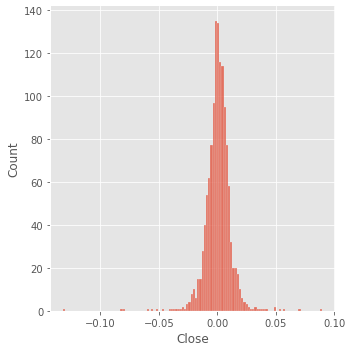

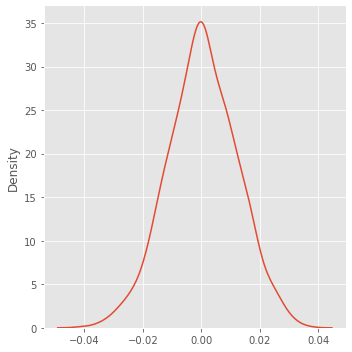

In [43]:
sns.displot(index_returns.dropna());
sns.displot(nornal_returns,kind='kde');

#### The first look at the index return shows that the daily Sensex returns are not normally distributed and there are significant outliers

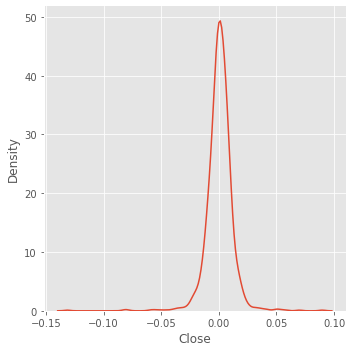

In [33]:
sns.displot(index_returns.dropna(),kind='kde');

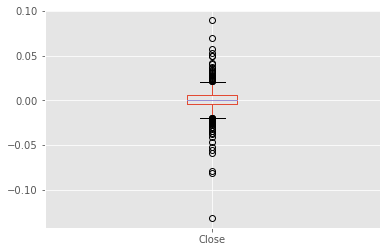

In [25]:
index_returns.plot(kind='box');

#### The box plot highlights the fact that there are significant outliers

In [65]:
outlier_data=index_data[(index_returns<-0.05) | (index_returns>0.05)]
outlier_data

,Date,Open,High,Low,Close
918,20-Sep-19,36214.92,38378.02,36085.74,38014.62
1034,9-Mar-20,36950.20,36950.20,35109.18,35634.95
1036,12-Mar-20,34472.50,34472.50,32493.10,32778.14
1038,16-Mar-20,33103.24,33103.24,31276.30,31390.07
1040,18-Mar-20,30968.84,31101.77,28613.05,28869.51
1042,20-Mar-20,28460.82,30418.20,27932.67,29915.96
1043,23-Mar-20,27608.80,27900.83,25880.83,25981.24
1045,25-Mar-20,26499.81,28790.19,26359.91,28535.78
1052,7-Apr-20,28898.36,30157.65,28602.31,30067.21
1068,4-May-20,32748.14,32748.14,31632.02,31715.35


In [85]:
outlier_data=outlier_data.reset_index()

In [101]:
outlier_data

,index,Date,Open,High,Low,Close
0,918,20-Sep-19,36214.92,38378.02,36085.74,38014.62
1,1034,9-Mar-20,36950.20,36950.20,35109.18,35634.95
2,1036,12-Mar-20,34472.50,34472.50,32493.10,32778.14
3,1038,16-Mar-20,33103.24,33103.24,31276.30,31390.07
4,1040,18-Mar-20,30968.84,31101.77,28613.05,28869.51
5,1042,20-Mar-20,28460.82,30418.20,27932.67,29915.96
6,1043,23-Mar-20,27608.80,27900.83,25880.83,25981.24
7,1045,25-Mar-20,26499.81,28790.19,26359.91,28535.78
8,1052,7-Apr-20,28898.36,30157.65,28602.31,30067.21
9,1068,4-May-20,32748.14,32748.14,31632.02,31715.35


In [110]:
outlier_data['Previous Close']=0
outlier_data

,index,Date,Open,High,Low,Close,Previous Close
0,918,20-Sep-19,36214.92,38378.02,36085.74,38014.62,0
1,1034,9-Mar-20,36950.20,36950.20,35109.18,35634.95,0
2,1036,12-Mar-20,34472.50,34472.50,32493.10,32778.14,0
3,1038,16-Mar-20,33103.24,33103.24,31276.30,31390.07,0
4,1040,18-Mar-20,30968.84,31101.77,28613.05,28869.51,0
5,1042,20-Mar-20,28460.82,30418.20,27932.67,29915.96,0
6,1043,23-Mar-20,27608.80,27900.83,25880.83,25981.24,0
7,1045,25-Mar-20,26499.81,28790.19,26359.91,28535.78,0
8,1052,7-Apr-20,28898.36,30157.65,28602.31,30067.21,0
9,1068,4-May-20,32748.14,32748.14,31632.02,31715.35,0


In [112]:
for i in range(len(outlier_data)):
    outlier_data.iloc[i,6]=index_data.iloc[outlier_data['index'][i]-1]['Close']

In [113]:
outlier_data

,index,Date,Open,High,Low,Close,Previous Close
0,918,20-Sep-19,36214.92,38378.02,36085.74,38014.62,36093.47
1,1034,9-Mar-20,36950.20,36950.20,35109.18,35634.95,37576.62
2,1036,12-Mar-20,34472.50,34472.50,32493.10,32778.14,35697.40
3,1038,16-Mar-20,33103.24,33103.24,31276.30,31390.07,34103.48
4,1040,18-Mar-20,30968.84,31101.77,28613.05,28869.51,30579.09
5,1042,20-Mar-20,28460.82,30418.20,27932.67,29915.96,28288.23
6,1043,23-Mar-20,27608.80,27900.83,25880.83,25981.24,29915.96
7,1045,25-Mar-20,26499.81,28790.19,26359.91,28535.78,26674.03
8,1052,7-Apr-20,28898.36,30157.65,28602.31,30067.21,27590.95
9,1068,4-May-20,32748.14,32748.14,31632.02,31715.35,33717.62


##### Outlier data can be further investigated for the reason for the daily returns more than +/- 5%

### Simulation

In [51]:
last_price=index_data['Close'].iloc[-1]

In [52]:
last_price

50051.44

In [53]:
num_simulations=1000
num_days=252

In [54]:
simulated_data=pd.DataFrame()

In [55]:
for x in range(num_simulations):
    count=0
    daily_volatility=index_returns.std()
    
    price_series=[]
    
    price=last_price*(1+np.random.normal(0,daily_volatility))
    price_series.append(price)
    
    for y in range(num_days):
        if count==251:
            break
        price=price_series[count]*(1+np.random.normal(0,daily_volatility))
        price_series.append(price)
        count+=1
    
    simulated_data[x]=price_series

Text(0, 0.5, 'Index level')

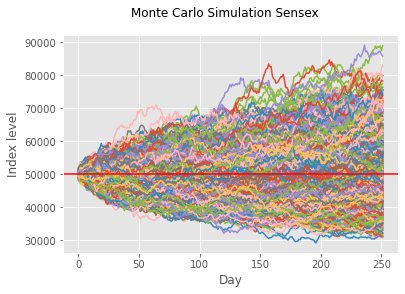

In [58]:
fig=plt.figure()
fig.suptitle('Monte Carlo Simulation Sensex')
plt.plot(simulated_data)
plt.axhline(y=last_price,color='r',linestyle='-')
plt.xlabel('Day')
plt.ylabel('Index level')

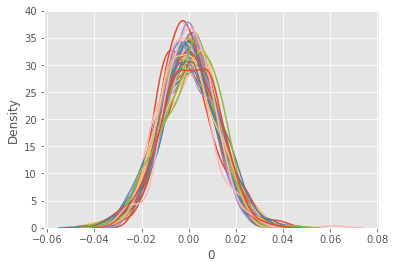

In [124]:
fig, ax = plt.subplots()
for i in range(50):
    sns.kdeplot(simulated_data[i].pct_change().dropna(),ax=ax)

#### distribution of returns of the first 50 simulated samples

### VaR - Value At Risk

##### VaR = position * stand dev of stock/index returns * z score for 0.95

In [118]:
import scipy
alpha=scipy.stats.norm.ppf(0.95)
alpha

1.6448536269514722

##### We wanted to know how much the market could possibly move against our position. VaR can be interpreated as - we are 95% confident that the daily loss would not exceed the VaR amount calculated as below 

In [119]:
position=100000
var=position*index_returns.dropna().std()*alpha

In [120]:
var

1911.3831395297868

#### VaR is the capital we need to support the position. In our example, to keep the long position of 100,000 we need 1912 capital 